---
title: TP - Implémentation des graphes par matrice d'adjacence
---

On considère un graphe $G$ dont les sommets sont les entiers de $0$ à $n-1$ et les arêtes sont les couples d'entiers $(i,j)$ avec $0\leq i,j\leq n-1$.

L'objectif de ce TP est d'implémenter les graphes en python par matrice d'adjacence.

**On considère ici que les graphes sont non orientés.**


## Implémentation simple

**Question 1** : Fonction permettant de créer un graphe comportant $n$ sommets et pas d'arêtes.

In [85]:
def make_graph(n: int) -> list:
    """Crée la matrice d'adjacence d'un graphe de n sommets sans arêtes"""
    g = []
    for i in range(n):
        line = [0 for j in range(n)]
        g.append(line)
    return g

In [86]:
# Test de la fonction make_graph

g = make_graph(5)
print(g)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


**Question 2** : Fonction permettant d'ajouter une arête entre les sommets $i$ et $j$.

In [87]:
def add_edge(g: list, i: int, j: int) -> None:
    """Ajoute l'arête (i,j) au graphe g"""
    g[i][j] = 1
    g[j][i] = 1

**Question 3 - Application** : en utilisant les deux fonctions précédentes, créer une variable `g` représentant le graphe suivant :

![graphe 1](graphe_tp1.png){width=50%}

In [105]:
# Entrer votre code ici
g = make_graph(5)
add_edge(g, 0, 0)
add_edge(g, 0, 1)
add_edge(g, 0, 2)
add_edge(g, 1, 2)
add_edge(g, 1, 3)
add_edge(g, 2, 3)
add_edge(g, 2, 4)
add_edge(g, 3, 4)
print(g)

[[1, 1, 1, 0, 0], [1, 0, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 1, 0, 1], [0, 0, 1, 1, 0]]


In [89]:
# Vérification
assert g == [[1, 1, 1, 0, 0], [1, 0, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 1, 0, 1], [0, 0, 1, 1, 0]]
print("Test réussi !")

Test réussi !


**Question 4** : Compléter la fonction `remove_edge` permettant de supprimer une arête entre les sommets $i$ et $j$.

In [90]:
def remove_edge(g: list, i: int, j: int) -> None:
    """Supprime l'arête (i,j) du graphe g"""
    g[i][j] = 0
    g[j][i] = 0

In [91]:
# Test de la fonction remove_edge
from copy import deepcopy

h = deepcopy(g)
remove_edge(h, 0, 1)
assert h == [[1, 0, 1, 0, 0], [0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 1, 0, 1], [0, 0, 1, 1, 0]]
print("Test réussi !")

Test réussi !


**Question 5** : Compléter les fonctions `add_vertex` et `remove_vertex` permettant d'ajouter un sommet et de supprimer un sommet dans un graphe. On rappelle que les sommets sont des entiers successifs. Par exemple, si on supprime le sommet $2$, les sommets $3$ et $4$ deviennent les sommets $2$ et $3$. Par ailleurs, le sommet ajouté par la fonction `add_vertex` doit être le plus grand sommet du graphe.

In [92]:
def add_vertex(g: list) -> None:
    """Ajoute un sommet à un graphe g"""
    n = len(g)
    line = [0 for j in range(n+1)]
    g.append(line)
    for i in range(n):
        g[i].append(0)

def remove_vertex(g: list, i: int) -> None:
    """Supprime le sommet i du graphe g"""
    n = len(g)
    if i < 0 or i >= n:
        raise IndexError
    else:
        for j in range(n):
            g[j].pop(i)
        g.pop(i)

In [93]:
# Test de la fonction add_vertex
h = deepcopy(g)
add_vertex(h)
assert h == [[1, 1, 1, 0, 0, 0], [1, 0, 1, 1, 0, 0], [1, 1, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0]]
print("Test réussi !")

Test réussi !


In [94]:
# Test de la fonction remove_vertex
remove_vertex(h, 5)
assert h == [[1, 1, 1, 0, 0], [1, 0, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 1, 0, 1], [0, 0, 1, 1, 0]]
print("Test réussi !")

Test réussi !


**Question 6** : Compléter la fonction `est_adjacent` qui prend en paramètre un graphe `g` et deux sommets `i` et `j` et qui renvoie `True` si les sommets sont adjacents et `False` sinon.

In [95]:
def is_adjacent(g: list, i: int, j: int) -> bool:
    """Renvoie True si les sommets i et j sont adjacents, False sinon"""
    return g[i][j] == 1

In [96]:
# Test de la fonction is_adjacent
assert is_adjacent(g, 0, 1) == True
assert is_adjacent(g, 0, 4) == False
print("Test réussi !")

Test réussi !


**Question 7** : Compléter la fonction `neighbors` qui prend en paramètre un graphe `g` et un sommet `i` et qui renvoie la liste des sommets adjacents au sommet `i`, puis la fonction `degree` qui prend en paramètre un graphe `g` et un sommet `i` et qui renvoie le degré du sommet `i`.

In [108]:
def neighbors(g: list, i: int) -> list:
    """Renvoie la liste des sommets autres que i 
       adjacents au sommet i"""
    n = []
    for j in range(len(g)):
        if is_adjacent(g, i, j) and i!=j :
            n.append(j)
    return n

def degree(g: list, i: int) -> int:
    """Renvoie le degré du sommet i"""
    return len(neighbors(g, i))

In [110]:
# Test de la fonction neighbors
assert neighbors(g, 0) == [1, 2]
assert neighbors(g, 1) == [0, 2, 3]

# Test de la fonction degree
assert degree(g, 0) == 2
assert degree(g, 1) == 3
print("Test réussi !")

Test réussi !


## Implémentation objet

**Question 8** : Créer une classe `Graph` permettant de représenter un graphe sous la forme d'une matrice d'adjacence, en reformulant les fonctions définies dans la partie précédente. Cette classe doit contenir les attributs suivants :

* `order` : nombre de sommets du graphe
* `matrix` : matrice d'adjacence du graphe

Cette classe doit contenir les méthodes suivantes :

* `__init__` : constructeur de la classe
* `add_edge` : ajoute une arête entre les sommets `i` et `j`
* `remove_edge` : supprime une arête entre les sommets `i` et `j`
* `add_vertex` : ajoute un sommet au graphe
* `remove_vertex` : supprime un sommet du graphe
* `is_adjacent` : renvoie `True` si les sommets `i` et `j` sont adjacents et `False` sinon
* `neighbors` : renvoie la liste des sommets adjacents au sommet `i`
* `degree` : renvoie le degré du sommet `i`
* `__str__` : renvoie une chaîne de caractères représentant le graphe en affichant les lignes de la matrice d'adjacence l'une en dessous de l'autre.


In [98]:
class Graph:

    def __init__(self, n: int):
        """Crée un graphe de n sommets sans arêtes"""
        self.order = n
        self.matrix = make_graph(n)

    def add_edge(self, i: int, j: int) -> None:
        """Ajoute l'arête (i,j) au graphe"""
        add_edge(self.matrix, i, j)

    def remove_edge(self, i: int, j: int) -> None:
        """Supprime l'arête (i,j) du graphe"""
        remove_edge(self.matrix, i, j)

    def add_vertex(self) -> None:
        """Ajoute un sommet au graphe"""
        add_vertex(self.matrix)

    def remove_vertex(self, i: int) -> None:
        """Supprime le sommet i du graphe"""
        remove_vertex(self.matrix, i)

    def is_adjacent(self, i: int, j: int) -> bool:
        """Renvoie True si les sommets i et j sont adjacents, False sinon"""
        return is_adjacent(self.matrix, i, j)

    def neighbors(self, i: int) -> list:
        """Renvoie la liste des sommets adjacents au sommet i"""
        return neighbors(self.matrix, i)
    
    def degree(self, i: int) -> int:
        """Renvoie le degré du sommet i"""
        return degree(self.matrix, i)

    def __str__(self):
        """Affiche le graphe"""
        rep = ""
        for line in self.matrix:
            rep += str(line) + "\n"
        return rep

**Question 9 - Application** : en utilisant la classe `Graph`, créer une variable `g` représentant le graphe suivant :

![graphe 2](grpahe1.png){width=50%}

Déterminer la liste des voisins du sommet $2$.

In [111]:
# Entrer votre code ici
g = Graph(7)
g.add_edge(0, 6)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 4)
g.add_edge(2, 5)
g.add_edge(3, 4)

g.neighbors(2)

[1, 4, 5]

**Bonus** : Implémenter une fonction `draw_graph` permettant de dessiner un graphe à partir de sa matrice d'adjacence.

Pour cela, on utilisera la bibliothèque `matplotlib.pyplot` et le module `networkx` qui est spécialisé dans l'analyse des graphes. Il s'agit donc de définir un graphe de type `networkx` à partir de la matrice d'adjacence du graphe et de le dessiner à l'aide de la fonction `draw` du module `networkx`.

In [112]:
# Imports nécessaires
import networkx as nx

Quelques commandes utiles :

* g = nx.Graph() : création d'un graphe vide
* g.add_node(i) : ajoute le sommet `i` au graphe `g`
* g.add_edge(i,j) : ajoute une arête entre les sommets `i` et `j`
* nx.draw(g) : dessine le graphe `g`

In [113]:
def draw_graph(g: Graph) -> None:
    """Dessine le graphe g"""
    # Création du graphe
    G = nx.Graph()
    for i in range(g.order):
        G.add_node(i)
    for i in range(g.order):
        for j in range(i+1, g.order):
            if g.is_adjacent(i, j):
                G.add_edge(i, j)
    # Dessin du graphe
    nx.draw(G, with_labels=True, node_color='white', font_size=18, edgecolors='black', node_size=500)

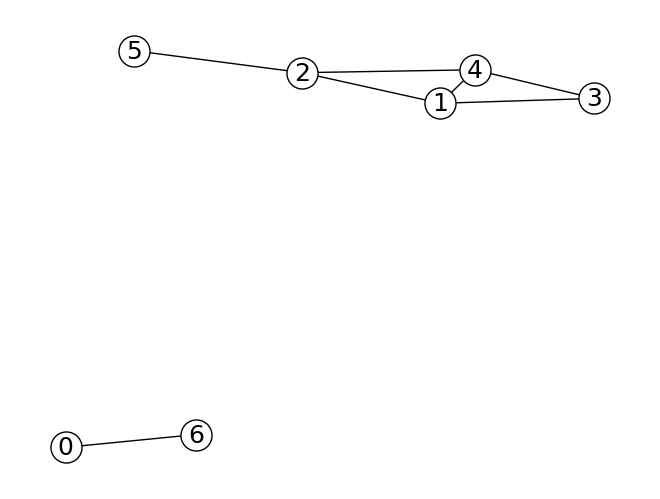

In [114]:
# Vérification de la fonction draw_graph
draw_graph(g)